<a href="https://colab.research.google.com/github/PavankumarUppar/AML/blob/main/CIE2Program6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIND-S Algorithm Result: ['Sunny', 'Warm', '?', 'Strong', '?', '?']
LIST THEN ELIMINATE Algorithm Result: ['Sunny', 'Warm', '?', '?', '?', '?']


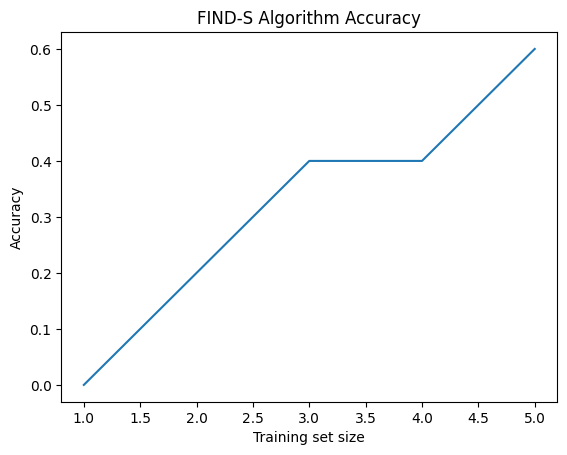

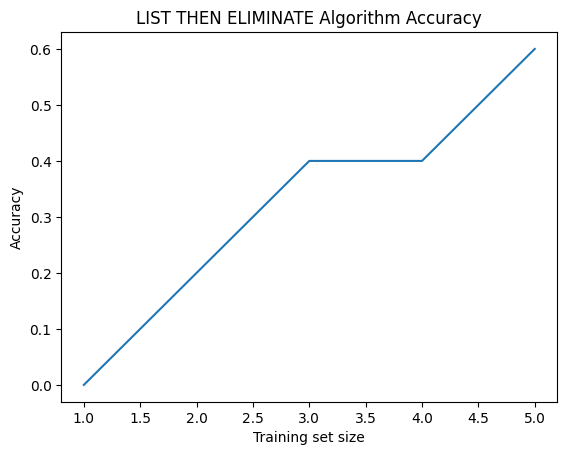

In [2]:
import matplotlib.pyplot as plt
import csv

def load_dataset(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        dataset = [row for row in reader]
    return dataset

def find_s_algorithm(dataset):
    num_attributes = len(dataset[0]) - 1
    hypothesis = ['0'] * num_attributes
    for instance in dataset:
        if instance[-1] == 'Yes':
            for i in range(num_attributes):
                if hypothesis[i] == '0':
                    hypothesis[i] = instance[i]
                elif hypothesis[i] != instance[i]:
                    hypothesis[i] = '?'
    return hypothesis

def list_then_eliminate_algorithm(dataset):
    num_attributes = len(dataset[0]) - 1
    hypothesis = ['0'] * num_attributes
    for instance in dataset:
        if instance[-1] == 'Yes':
            for i in range(num_attributes):
                if hypothesis[i] == '0':
                    hypothesis[i] = instance[i]
                elif hypothesis[i] != instance[i]:
                    hypothesis[i] = '?'
    for instance in dataset:
        if instance[-1] == 'No':
            for i in range(num_attributes):
                if hypothesis[i] == instance[i]:
                    hypothesis[i] = '?'
    return hypothesis

def calculate_accuracy(dataset, hypothesis):
    num_instances = len(dataset)
    num_correct = 0
    for instance in dataset:
        is_correct = True
        for i in range(len(hypothesis)):
            if hypothesis[i] != '?' and hypothesis[i] != instance[i]:
                is_correct = False
                break
        if is_correct:
            num_correct += 1
    return num_correct / num_instances

# Example usage
file_path = 'trainingdata.csv'
dataset = load_dataset(file_path)

# Applying the FIND-S algorithm
find_s_result = find_s_algorithm(dataset)
print("FIND-S Algorithm Result:", find_s_result)

# Applying the LIST THEN ELIMINATE algorithm
list_then_eliminate_result = list_then_eliminate_algorithm(dataset)
print("LIST THEN ELIMINATE Algorithm Result:", list_then_eliminate_result)

# Calculate and plot accuracy graph for FIND-S algorithm
find_s_accuracy_values = []
for i in range(1, len(dataset) + 1):
    hypothesis = find_s_algorithm(dataset[:i])
    accuracy = calculate_accuracy(dataset, hypothesis)
    find_s_accuracy_values.append(accuracy)

plt.plot(range(1, len(dataset) + 1), find_s_accuracy_values)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('FIND-S Algorithm Accuracy')
plt.show()

# Calculate and plot accuracy graph for LIST THEN ELIMINATE algorithm
list_then_eliminate_accuracy_values = []
for i in range(1, len(dataset) + 1):
    hypothesis = list_then_eliminate_algorithm(dataset[:i])
    accuracy = calculate_accuracy(dataset, hypothesis)
    list_then_eliminate_accuracy_values.append(accuracy)

plt.plot(range(1, len(dataset) + 1), list_then_eliminate_accuracy_values)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('LIST THEN ELIMINATE Algorithm Accuracy')
plt.show()
